Вариант 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
auto = pd.read_csv('autos.csv',encoding = "ISO-8859-1")

1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

autos.csv: содержит данные о более чем 370 000 подержанных автомобилях.

- dateCrawled: при первом просмотре объявления все значения полей были взяты из этой даты

- name: название автомобиля

- seller: частное лицо или дилер

- offerType: тип сделки

- price: цена, указанная в объявлении о продаже автомобиля

- abtest: включена ли сделка в A/B-тест

- vehicleType: тип автомобиля

- yearOfRegistration: в каком году автомобиль был впервые зарегистрирован

- gearbox: тип коробки передач

- powerPS: мощность автомобиля в л.с.

- model: модель автомобиля

- kilometer: сколько километров проехал автомобиль

- monthOfRegistration: в каком месяце автомобиль был впервые зарегистрирован

- fuelType: тип топлива

- brand: марка

- notRepairedDamage : есть ли у автомобиля повреждения, которые еще не устранены

- dateCreated: дата, в которую было создано объявление на ebay

- nrOfPictures: количество фотографий в объявлении (это поле везде содержит 0 и, следовательно, бесполезно)
postalCode

- postalCode: почтовый индекс

- lastSeenOnline: когда скрипт в последний раз видел объявление онлайн

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

2. Проанализируйте колонки в наборе данных и сделайте вывод в какой колонке находится целевое значение, которое должна прогнозировать модель. Анализ отразите в ноутбуке.

Поле price может использоваться для оценки цены транспорта по прочим характеристикам.

Поскольку уже есть колонки для марки и модели, название излишне.
Скрапер работал с 03-05 по 04-07. Так как срок небольшой, цены на автомобили или доступность не изменятся значительно в течение этого периода. Раз анализ временных рядов по dateCrawled не нужен, колонка тоже не нужна.

In [ ]:
auto=auto.drop(['dateCrawled','name'],axis=1)

Создадим колонку, показывающую время в секундах между созданием обьявления и продажей автомобиля. Предположим, что на долго непродающиеся автомобили цена снижается.

In [ ]:
lastSeen_datetime=pd.to_datetime(auto['lastSeen'])
dateCreated_datetime=pd.to_datetime(auto['dateCreated'])
time_online = lastSeen_datetime - dateCreated_datetime
time_online = time_online.dt.total_seconds()
auto['timeOnline']=time_online

In [ ]:
auto=auto.drop(['dateCreated','lastSeen'],axis=1)

3. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

Дубликаты будут удалены после обработки признаков. В процессе обработки предполагается, что индекс данных совпадает с неявным индексом массива NumPy. Если удалить строки, индекс данных не будет последовательным, что приведет к образованию NaN в некоторых полях.

4. Удалите выбросы из числовых данных. Используйте критерий 1.5-межквантильного интервала. Приведите диаграммы BoxPlot до и после удаления выбросов

Почтовый индекс рассматривается как категориальное значение.

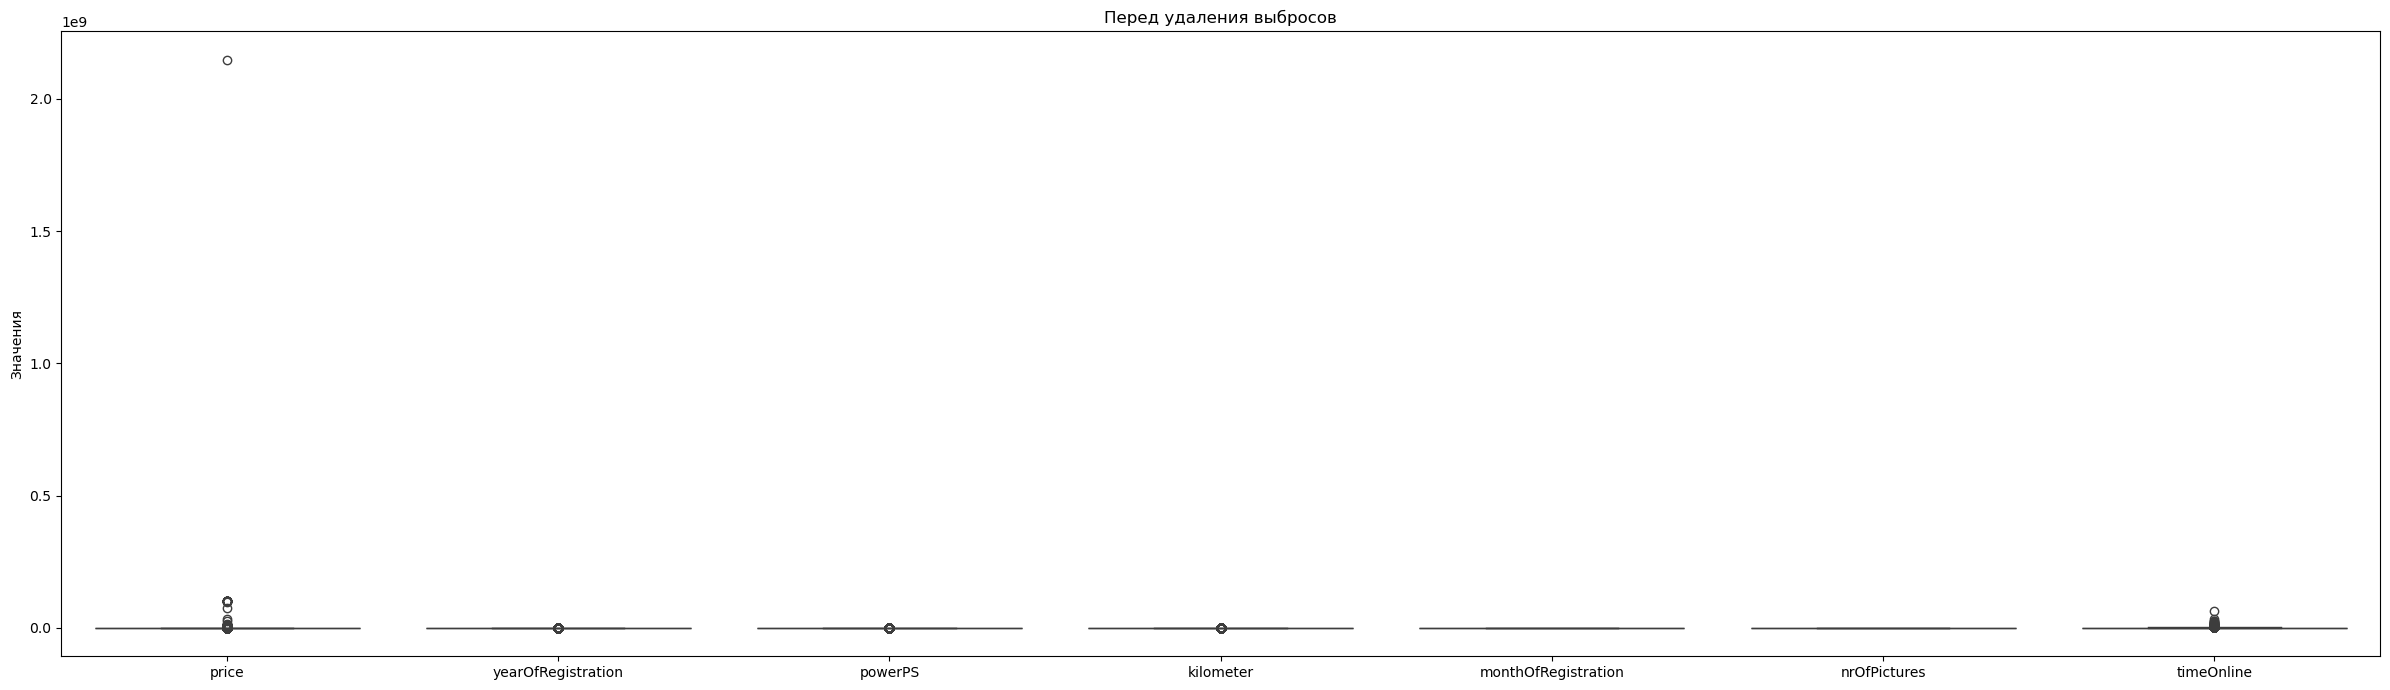

In [ ]:
plt.figure(figsize=(24, 7))

df_features = auto.select_dtypes(include='number').drop(['postalCode'],axis=1)

sns.boxplot(data=df_features)
plt.title('Перед удаления выбросов')
plt.ylabel('Значения')

plt.tight_layout()
plt.show()

In [ ]:
df_features = auto.select_dtypes(include='number').drop(['postalCode'],axis=1)

In [ ]:
columns = df_features.columns.tolist()
for x in columns:
  Q1, Q3 = auto[x].quantile([0.25, 0.75])
  IQR = Q3 - Q1
  bottom, top = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
  auto[x] = auto[x].clip(lower=bottom, upper=top)

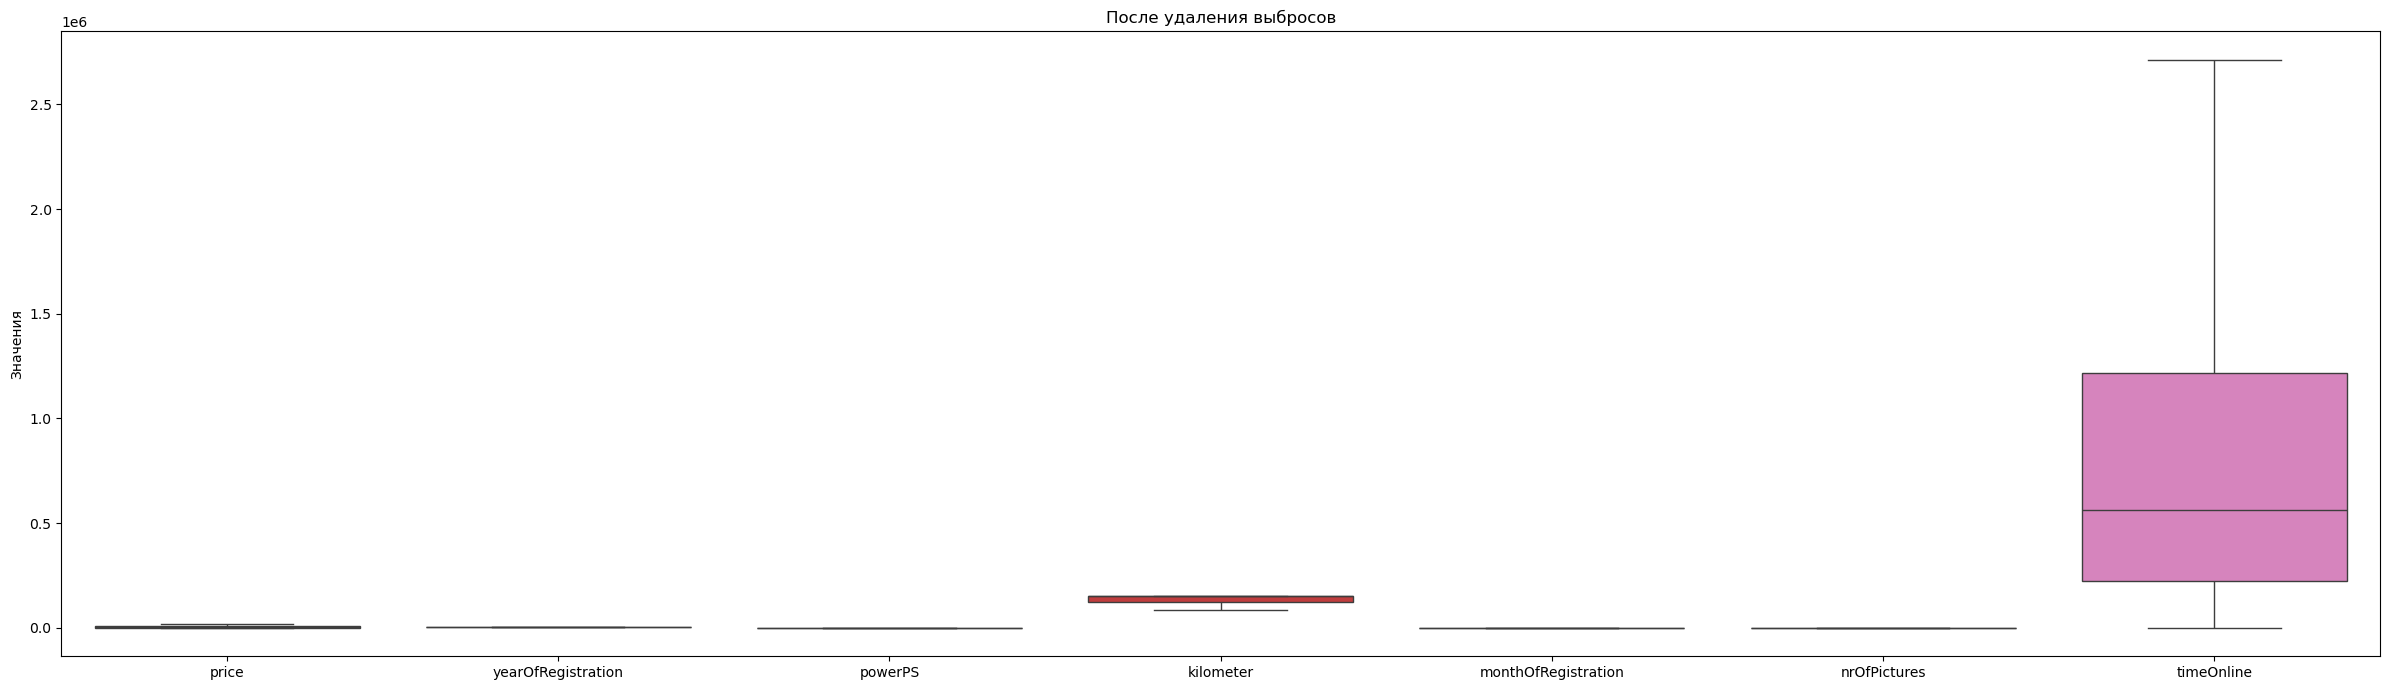

In [ ]:
plt.figure(figsize=(24, 7))
df_features = auto.select_dtypes(include='number').drop(['postalCode'],axis=1)
sns.boxplot(data=df_features)
plt.title('После удаления выбросов')
plt.ylabel('Значения')

plt.tight_layout()
plt.show()

5. Оцените корреляцию между числовыми признаками, постройте матрицу корреляции. Найдите признаки, которые коррелируют с наибольшим числом других и выпишите их >|0.5| (все кроме целевой колонки).

Так как задачей было найти признак с наибольшим числом корреляций, положительных и отрицательных, значения корреляции были взяты в модуле.

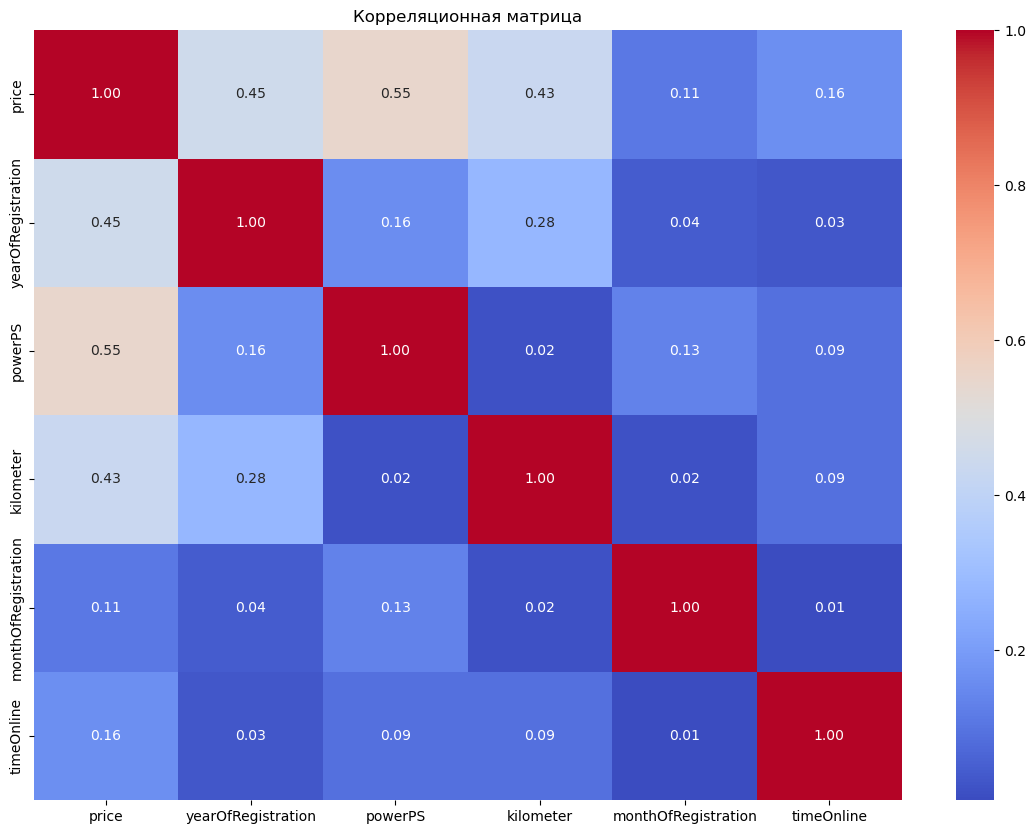

In [ ]:
df=auto.select_dtypes(include='number').drop(['postalCode','nrOfPictures'],axis=1) #nrOfPictures - нет значений

correlation_matrix = df.corr().abs()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

С наибольшим числом признаков коррелирует price.

6. Проанализируйте колонки на наличие нулевых значений. Выведите количество нулевых по каждой колонке.

In [ ]:
auto.isnull().sum()

seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
nrOfPictures               0
postalCode                 0
timeOnline                 0
dtype: int64

7. Проанализируйте почему в той или иной колонке могут присутствовать нулевые значения.

Не в каждом обьявлении могли быть указаны тип транспорта, модель, неустраненные повреждения и прочее. Отсутствия значений в колонке nrOfPictures - ошибка скрипта скрапера.

8. Выполните удаление столбцов с большим количеством нулевых значений, где это возможно, используйте Imputers для числовых колонок.

In [ ]:
(auto['nrOfPictures'] == 0).sum()

371528

In [ ]:
len(auto)

371528

В notRepairedDamage ~20% значений нулевые. Количество достаточно большое, убираем

In [ ]:
auto=auto.drop(['nrOfPictures','notRepairedDamage'],axis=1)

In [ ]:
#replacing cateforical features with neutral values
columns=['vehicleType','gearbox','model','fuelType']
for x in columns:
  auto[x] = auto[x].fillna('missing')

In [ ]:
auto.isna().sum()

seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
postalCode             0
timeOnline             0
dtype: int64

4. Выполните масштабирование количественных (числовых) признаков:
        a. Постройте диаграммы BoxPlot для признаков до масштабирования.

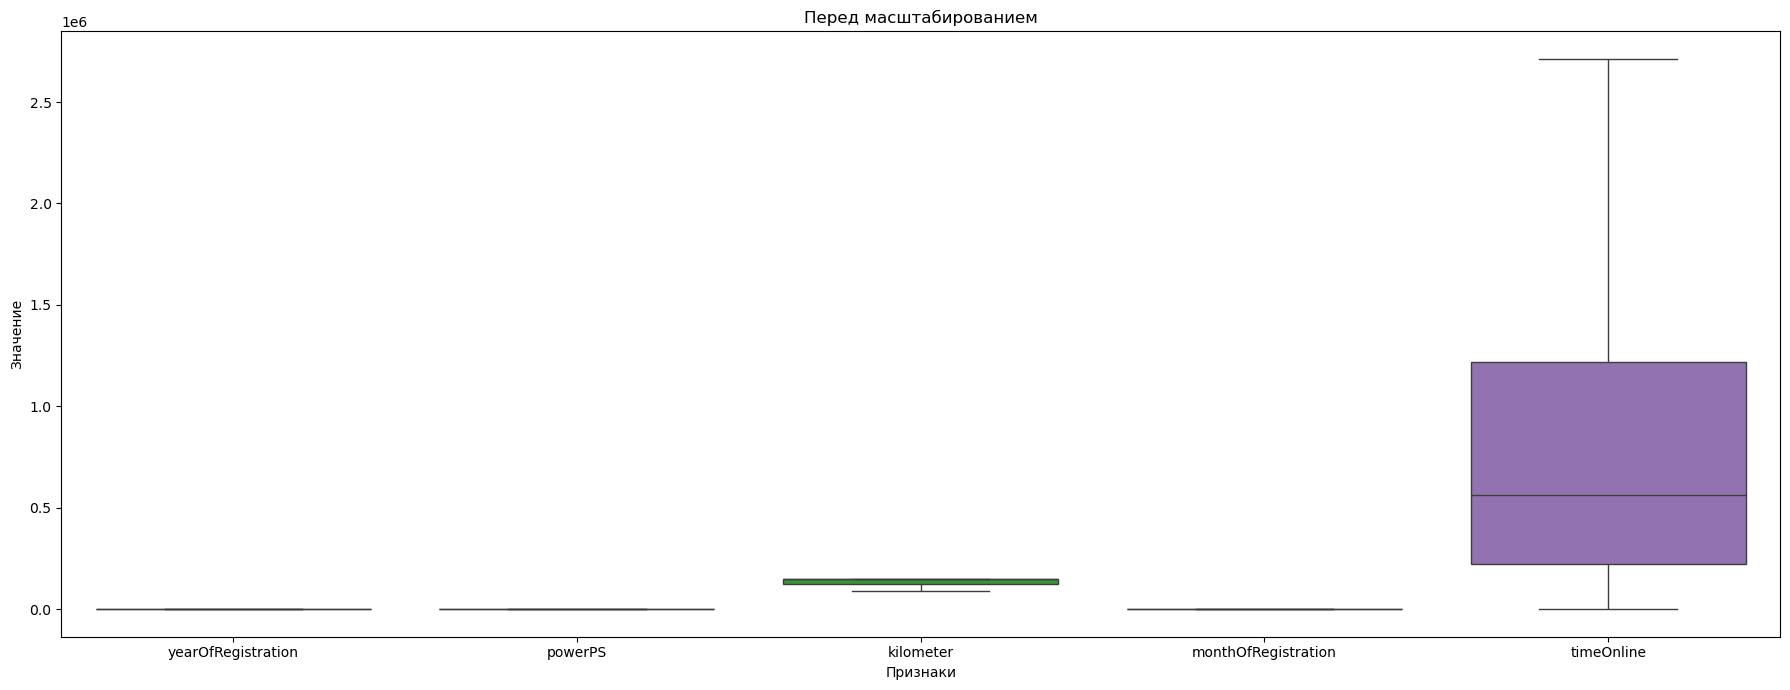

In [ ]:
plt.figure(figsize=(18, 7))

df_features = auto.select_dtypes(include='number').drop(['postalCode','price'],axis=1)

sns.boxplot(data=df_features)
plt.title('Перед масштабированием')
plt.xlabel('Признаки')
plt.ylabel('Значение')

plt.tight_layout()
plt.show()

b. Выберите способ масштабирования (например, нормализацию или стандартизацию MinMaxScaler, StandardScaler)

Для масштабированя была выбрана нормализация. Нормализация признаков необходима для нормальной работы линейных моделей.

c. Выполните масштабирование выбранным методом

In [ ]:
df_features = auto.select_dtypes(include='number').drop(['postalCode','price'],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns=df_features.columns.tolist()
for x in columns:
  scaled = scaler.fit_transform(auto[[x]])
  auto[x] = pd.DataFrame(scaled, columns=[x])

d. Постройте диаграммы BoxPlot для признаков после масштабирования.

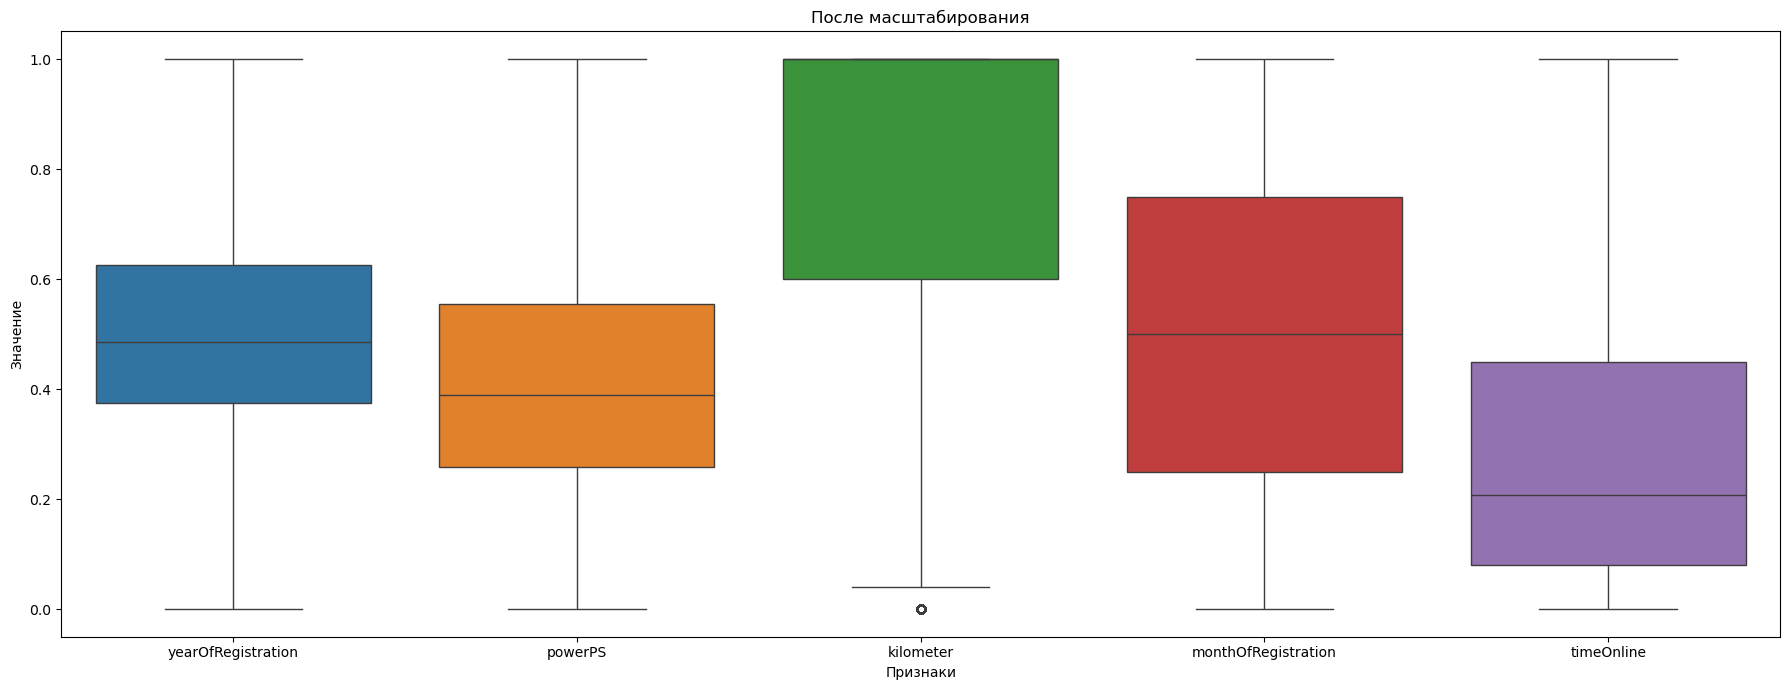

In [ ]:
plt.figure(figsize=(18, 7))

df_features = auto.select_dtypes(include='number').drop(['postalCode','price'],axis=1)

sns.boxplot(data=df_features)
plt.title('После масштабирования')
plt.xlabel('Признаки')
plt.ylabel('Значение')

plt.tight_layout()
plt.show()

3. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [ ]:
auto.shape

(371528, 15)

In [ ]:
auto.duplicated().sum()

191

In [ ]:
auto.drop_duplicates(inplace=True)

In [ ]:
auto.shape

(371337, 15)

5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены; (label encoder и one hot encoder)

Замена была произведена через One-Hot Encoder - такое кодирование лучше подходит для номинальных категорий, не имеющих внутреннего порядка. Категориальные признаки - seller, offerType, abtest, vehicleType, gearbox, model, fuelType, brand.
Почтовый индекс был заменен через Label Encoder - для OHE в колонке слишком много категорий.

In [ ]:
from sklearn.preprocessing import LabelEncoder
auto_OHE = pd.get_dummies(auto, drop_first=True)
auto_OHE['postalCode']=LabelEncoder().fit_transform(auto_OHE['postalCode'])
auto_OHE.head()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode,timeOnline,seller_privat,offerType_Gesuch,abtest_test,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,480,0.208333,0.000000,1.00,0.000000,4901,0.450054,True,False,True,...,False,False,False,False,False,False,False,False,True,False
1,16275,0.708333,0.703704,0.60,0.416667,4618,0.448060,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,9800,0.513889,0.603704,0.60,0.666667,6998,0.717697,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1500,0.430556,0.277778,1.00,0.500000,7038,0.022904,True,False,True,...,False,False,False,False,False,False,False,False,True,False
4,3600,0.625000,0.255556,0.04,0.583333,4215,0.204354,True,False,True,...,False,True,False,False,False,False,False,False,False,False


7. Решите поставленную задачу классификации (см. пункт 2):
  
  a. Разделите набор данных на две выборки: обучение и тест

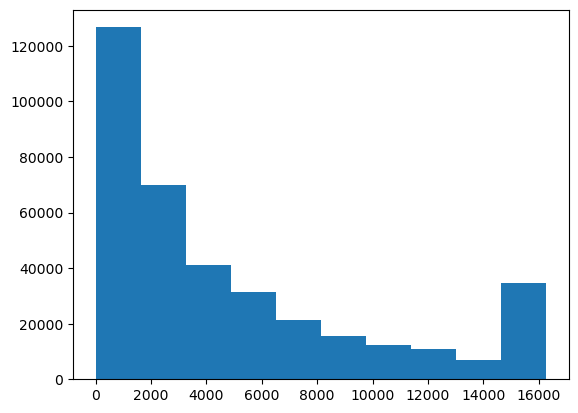

In [ ]:
plt.hist(auto['price'])
plt.show()

Распределение цены смещено влево (много дешевых автомобилей, меньше дорогих). Линейные модели работают лучше, когда целевая переменная ближе к нормальному распределению. Логарифмическое преобразование цены может помочь достичь этого.

In [ ]:
auto_OHE['price_log'] = np.log1p(auto['price'])

In [ ]:
from sklearn.model_selection import train_test_split
X = auto_OHE.drop(['price','price_log'], axis=1)
y = auto_OHE['price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

Набор был разделен на выборки в соотношении 70/30.



b. По каждому методу регрессии из задания изучите возможные для изменения параметры и их значения

1 – линейная регрессия без использования регуляризаторов:

1. fit_intercept - Следует ли вычислять intercept (b0) для этой модели. Если установлено значение False, intercept не будет использоваться в расчетах (т.е. ожидается, что данные будут центрированы)
2. copy_X - Если значение равно True, то X будет скопирован; в противном случае он может быть перезаписан
3. n_jobs - Количество заданий, используемых для вычисления
4. positive - Если установлено True, то коэффициенты принудительно будут положительными.

---

2 – линейная регрессия, LASSO регуляризатор. Кроме параметров, указанных выше:

1. alpha - Константа, умножающая L1, определяющая силу регуляризации; неотрицательное значение с плавающей точкой
2. selection - Стратегия, используемая для выбора разделения на каждом узле. Поддерживаются стратегии “best” для выбора наилучшего разделения и “random” для выбора наилучшего случайного разделения
3. precompute - Следует ли использовать предварительно вычисленную матрицу Gram для ускорения вычислений
4. max_iter - Максимальное количество итераций
5. tol - Допуск для оптимизации
6. warm_start - Если установлено значение True, повторно использует решение предыдущего вызова, в противном случае удаляет предыдущее решение
7. random_state - По умолчанию cyclic. Если установлено random, случайный коэффициент обновляется на каждой итерации, а не последовательно перебирается по объектам по умолчанию

c. При подборе параметров модели регрессии используйте перекрёстную проверку (GridSearch CrossValidate). Обоснуйте выбор метрики для параметра refit в GridSearchCV.

Была выбрана метрика MAE. Она представляет собой среднюю абсолютную разницу между прогнозируемым и фактическим значением. Это легко интерпретируемое значение ("в среднем прогноз отклоняется на X дней") и менее чувствительное к выбросам, чем RMSE.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression, Lasso

param_grid_LinReg = {
    'fit_intercept': [True, False]
}
param_grid_Lasso = {
    'alpha': [0.01, 0.1, 1.0],
    'max_iter': [1000, 2000],
    'selection': ['cyclic', 'random']
}

reg = LinearRegression()
lasso = Lasso()

In [ ]:
grid_search_reg = GridSearchCV(
    estimator=reg,
    param_grid=param_grid_LinReg,
    scoring='neg_mean_absolute_error',
    refit='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid_Lasso,
    scoring='neg_mean_absolute_error',
    refit='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [ ]:
reg = grid_search_reg.fit(X_train, y_train)
lasso = grid_search_lasso.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
print(f"Лучшие параметры LinearRegression: {reg.best_params_}")
print(f"Лучший результат кросс валидации LinearRegression (MAE): {reg.best_score_:.4f}")

print(f"Лучшие параметры Lasso: {lasso.best_params_}")
print(f"Лучший результат кросс валидации Lasso (MAE): {lasso.best_score_:.4f}")

best_ovr_model_reg = reg.best_estimator_
best_ovr_model_lasso = lasso.best_estimator_

y_pred_log_reg = best_ovr_model_reg.predict(X_test)
y_pred_log_lasso = best_ovr_model_lasso.predict(X_test)

#Обратное преобразование к исходной шкале цен
y_pred_reg = np.expm1(y_pred_log_reg)
y_pred_lasso = np.expm1(y_pred_log_lasso)

#Исходные значения y_test для расчета MAE
y_test_original = np.expm1(y_test)

Лучшие параметры LinearRegression: {'fit_intercept': True}
Лучший результат кросс валидации LinearRegression (MAE): -0.7208
Лучшие параметры Lasso: {'alpha': 0.01, 'max_iter': 2000, 'selection': 'random'}
Лучший результат кросс валидации Lasso (MAE): -0.7541


d. Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным на тестовой выборке (MAE или MSE).

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_reg = mean_absolute_error(y_test_original, y_pred_reg)
mae_lasso = mean_absolute_error(y_test_original, y_pred_lasso)

print(f"MAE для линейной регрессии: {mae_reg:.4f}")
print(f"MAE для линейной регрессии c LASSO регуляризацией: {mae_lasso:.4f}")

MAE для линейной регрессии: 2053.4782
MAE для линейной регрессии c LASSO регуляризацией: 2045.9526


In [ ]:
y_test_original.mean()

4935.320990646487

Наблюдается значительная ошибка ~40%.

e. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным. Проанализируйте значение p-value.

In [ ]:
import scipy.stats

print('Для линейной регрессии:')

corrP,pP=scipy.stats.pearsonr(y_test_original, y_pred_reg)
corrS,pS=scipy.stats.spearmanr(y_test_original, y_pred_reg)

print(f'Коэффициент корреляции Пирсона: {corrP}, p: {pP}\nКоэффициент корреляции Спирмена: {corrS}, p: {pS}')

print('\nДля линейной регрессии c LASSO:')

corrP,pP=scipy.stats.pearsonr(y_test_original, y_pred_lasso)
corrS,pS=scipy.stats.spearmanr(y_test_original, y_pred_lasso)

print(f'Коэффициент корреляции Пирсона: {corrP}, p: {pP}\nКоэффициент корреляции Спирмена: {corrS}, p: {pS}')

Для линейной регрессии:
Коэффициент корреляции Пирсона: 0.738913155736982, p: 0.0
Коэффициент корреляции Спирмена: 0.8291308980452846, p: 0.0

Для линейной регрессии c LASSO:
Коэффициент корреляции Пирсона: 0.7784670497784658, p: 0.0
Коэффициент корреляции Спирмена: 0.7979535217425773, p: 0.0


Значение p крайне мало, меньше точности отображения. Для обеих моделей коэффициенты корреляции между фактическими значениями и прогнозируемыми значениями являются статистически значимыми. Это подтверждает, что такая работоспособность моделей не случайна.